In [1]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")

# Loading the dataset
file_path = 'train.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows
head_data = data.head()
print(head_data.to_markdown(index=False))

|   PassengerId | HomePlanet   | CryoSleep   | Cabin   | Destination   |   Age | VIP   |   RoomService |   FoodCourt |   ShoppingMall |   Spa |   VRDeck | Name              | Transported   |
|--------------:|:-------------|:------------|:--------|:--------------|------:|:------|--------------:|------------:|---------------:|------:|---------:|:------------------|:--------------|
|       0001_01 | Europa       | False       | B/0/P   | TRAPPIST-1e   |    39 | False |             0 |           0 |              0 |     0 |        0 | Maham Ofracculy   | False         |
|       0002_01 | Earth        | False       | F/0/S   | TRAPPIST-1e   |    24 | False |           109 |           9 |             25 |   549 |       44 | Juanna Vines      | True          |
|       0003_01 | Europa       | False       | A/0/S   | TRAPPIST-1e   |    58 | True  |            43 |        3576 |              0 |  6715 |       49 | Altark Susent     | False         |
|       0003_02 | Europa       | False       

In [2]:
# Basic exploration
print(data.info())
print(data.describe().to_markdown(index=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
|       |       Age |   RoomService |   FoodCourt |   ShoppingMall |       Spa |    VRDeck |
|:------|----------:|--------------:|-------

In [3]:
def check_null_values(data):
    """
    Checks for null values in the dataset and calculates their percentages.

    Parameters:
    - data (DataFrame): The dataset to check for null values.

    Returns:
    - DataFrame: A table containing columns, null counts, and null percentages.
    """
    # Null values and their percentages
    null_values = data.isnull().sum()
    null_percentage = (null_values / len(data)) * 100
    
    # Table of results
    null_table = pd.DataFrame({
        'Column': null_values.index,
        'Null Count': null_values.values,
        'Null Percentage': null_percentage.values
    })
    
    return null_table

null_table = check_null_values(data)
print(null_table.to_markdown())

|    | Column       |   Null Count |   Null Percentage |
|---:|:-------------|-------------:|------------------:|
|  0 | PassengerId  |            0 |           0       |
|  1 | HomePlanet   |          201 |           2.31221 |
|  2 | CryoSleep    |          217 |           2.49626 |
|  3 | Cabin        |          199 |           2.2892  |
|  4 | Destination  |          182 |           2.09364 |
|  5 | Age          |          179 |           2.05913 |
|  6 | VIP          |          203 |           2.33521 |
|  7 | RoomService  |          181 |           2.08214 |
|  8 | FoodCourt    |          183 |           2.10514 |
|  9 | ShoppingMall |          208 |           2.39273 |
| 10 | Spa          |          183 |           2.10514 |
| 11 | VRDeck       |          188 |           2.16266 |
| 12 | Name         |          200 |           2.3007  |
| 13 | Transported  |            0 |           0       |


In [4]:
def impute_null_values(data):
    """
    Imputes null values in the dataset.
    - Numeric columns: Filled with the median.
    - Categorical columns: Filled with the most frequent value (mode).

    Parameters:
    - data (DataFrame): The dataset to impute null values.

    Returns:
    - DataFrame: The dataset with imputed null values.
    """
    for column in data.columns:
        # Check if the column is numeric
        if data[column].dtype in ['float64', 'int64']:
            # Fill numeric nulls with median
            data[column].fillna(data[column].median(), inplace=True)
        else:
            # Fill categorical nulls with mode
            data[column].fillna(data[column].mode()[0], inplace=True)
    return data


# Impute missing values
data = impute_null_values(data)

In [5]:
null_table = check_null_values(data)
print(null_table.to_markdown())

|    | Column       |   Null Count |   Null Percentage |
|---:|:-------------|-------------:|------------------:|
|  0 | PassengerId  |            0 |                 0 |
|  1 | HomePlanet   |            0 |                 0 |
|  2 | CryoSleep    |            0 |                 0 |
|  3 | Cabin        |            0 |                 0 |
|  4 | Destination  |            0 |                 0 |
|  5 | Age          |            0 |                 0 |
|  6 | VIP          |            0 |                 0 |
|  7 | RoomService  |            0 |                 0 |
|  8 | FoodCourt    |            0 |                 0 |
|  9 | ShoppingMall |            0 |                 0 |
| 10 | Spa          |            0 |                 0 |
| 11 | VRDeck       |            0 |                 0 |
| 12 | Name         |            0 |                 0 |
| 13 | Transported  |            0 |                 0 |


# Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function for Categorical Charts
def plot_categorical_chart(data, column, chart_type='bar'):
    """
    Plots a categorical chart (bar or pie chart) for a specified column.

    Parameters:
    - data (DataFrame): The dataset.
    - column (str): The column name for plotting.
    - chart_type (str): Type of chart ('bar' or 'pie').
    """
    plt.figure(figsize=(6, 4))
    if chart_type == 'bar':
        data[column].value_counts().plot(kind='bar', color='skyblue', alpha=0.9, edgecolor='black')
        plt.ylabel('Count')
    elif chart_type == 'pie':
        data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
        plt.ylabel('')
    plt.title(f"{chart_type.capitalize()} Chart of {column}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

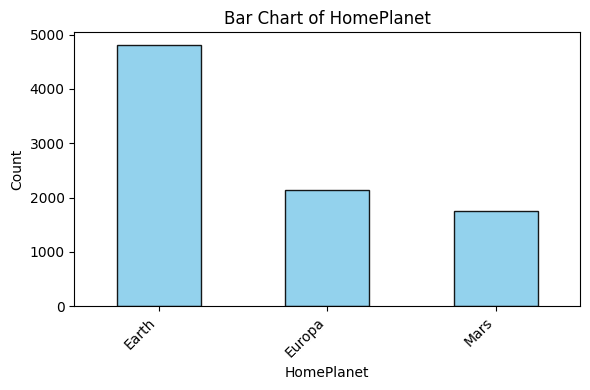

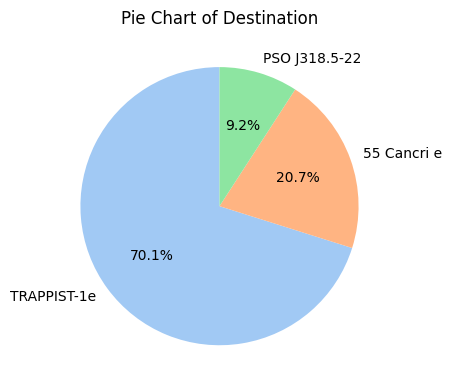

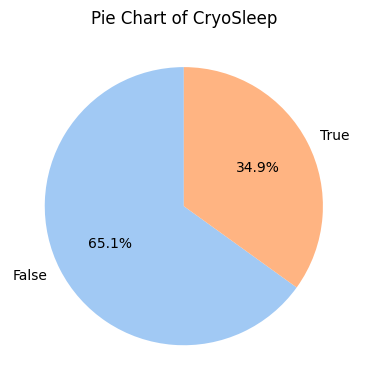

In [7]:
# Categorical Charts
plot_categorical_chart(data, 'HomePlanet', chart_type='bar')
plot_categorical_chart(data, 'Destination', chart_type='pie')
plot_categorical_chart(data, 'CryoSleep', chart_type='pie')

In [10]:
import numpy as np

def plot_statistical_chart(data, chart_type='heatmap', columns=None):
    """
    Plots a statistical chart like heatmap, boxplot, or strip plot.

    Parameters:
    - data (DataFrame): The dataset.
    - chart_type (str): Type of chart ('heatmap', 'box', 'strip').
    - columns (list): Columns to include in the chart (optional for heatmap).
    """
    plt.figure(figsize=(6, 4))
    if chart_type == 'heatmap':
        # Heatmap for correlation matrix
        sns.heatmap(data.select_dtypes(np.number).corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
        plt.title("Correlation Heatmap")
    elif chart_type == 'box':
        # Box plot for selected columns
        plt.figure(figsize=(2 * len(columns), 4))
        for i, col in enumerate(columns):
            plt.subplot(1, len(columns), i + 1)
            sns.boxplot(data=data[col], palette="Set2")
            plt.title(col)
    elif chart_type == 'strip':
        # Strip plot for selected columns
        plt.figure(figsize=(2 * len(columns), 4))
        for i, col in enumerate(columns):
            plt.subplot(1, len(columns), i + 1)
            sns.stripplot(data=data, x=col, color='purple', alpha=0.7, jitter=True)
            plt.title(col)
            plt.xlabel("")
    plt.tight_layout()
    plt.show()

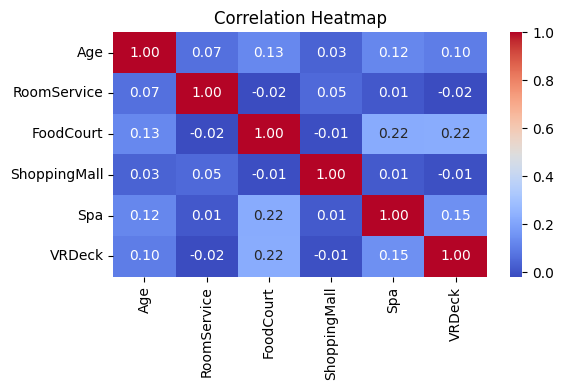

<Figure size 600x400 with 0 Axes>

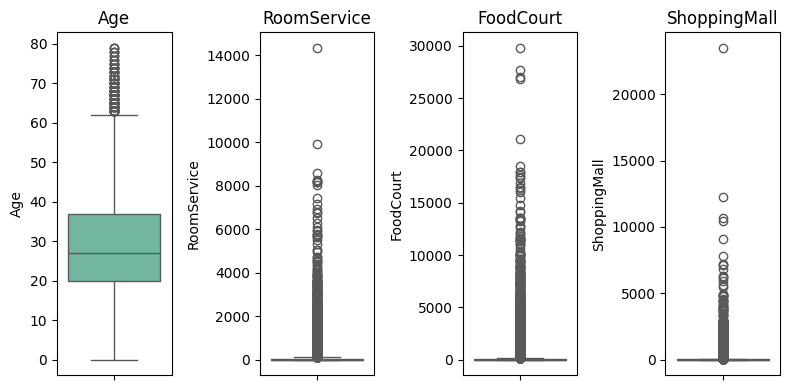

<Figure size 600x400 with 0 Axes>

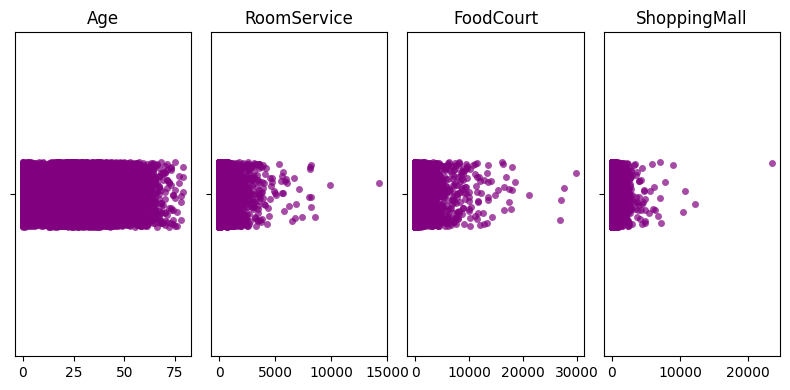

In [12]:
# Call for heatmap
plot_statistical_chart(data, chart_type='heatmap')

# Call for box plot
plot_statistical_chart(data, chart_type='box', columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall'])

# Call for strip plot
plot_statistical_chart(data, chart_type='strip', columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall'])


In [13]:
# Function for Relational Charts
def plot_relational_with_target(data, target_col, chart_type='stacked_bar', cat_col=None, num_col=None):
    """
    Plots relational charts showing relationships with the target feature.

    Parameters:
    - data (DataFrame): The dataset.
    - target_col (str): Target column to analyze relationships with.
    - chart_type (str): Type of chart ('stacked_bar', 'avg_bar').
    - cat_col (str): Categorical column (used for stacked bar chart).
    - num_col (str): Numerical column (used for average value bar chart).
    """
    if chart_type == 'stacked_bar' and cat_col:
        # Stacked bar chart: target vs categorical feature
        target_distribution = data.groupby([cat_col, target_col]).size().unstack(fill_value=0)
        print(target_distribution)
        target_distribution.plot(kind='bar', stacked=True, figsize=(6, 4), color=['skyblue', 'salmon'], alpha=0.9, edgecolor='black')
        plt.title(f"Stacked Bar Chart: {cat_col} vs {target_col}")
        plt.xlabel(cat_col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=target_col, loc='upper right')
        plt.tight_layout()
        plt.show()
    
    elif chart_type == 'avg_bar' and num_col:
        # Bar chart: average numerical value for each target category
        avg_values = data.groupby(target_col)[num_col].mean()
        print(avg_values)
        avg_values.plot(kind='bar', color='purple', alpha=0.7, edgecolor='black', figsize=(6, 4))
        plt.title(f"Average {num_col} by {target_col}")
        plt.xlabel(target_col)
        plt.ylabel(f"Average {num_col}")
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

Transported  False  True 
HomePlanet               
Earth         2749   2054
Europa         727   1404
Mars           839    920


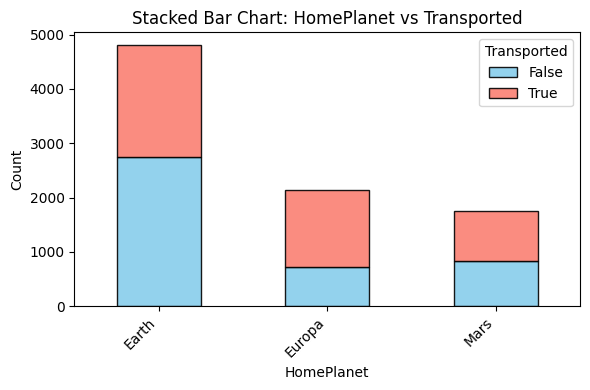

Transported    False  True 
Destination                
55 Cancri e      702   1098
PSO J318.5-22    395    401
TRAPPIST-1e     3218   2879


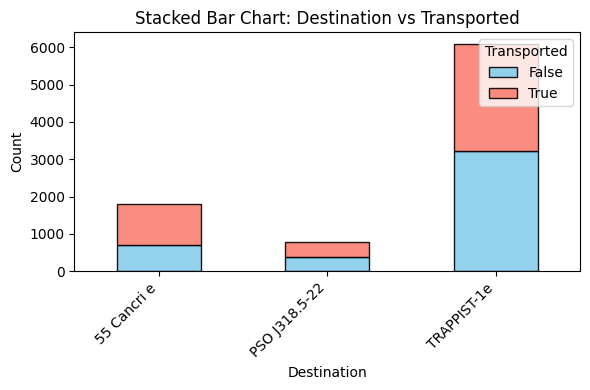

Transported  False  True 
CryoSleep                
False         3761   1895
True           554   2483


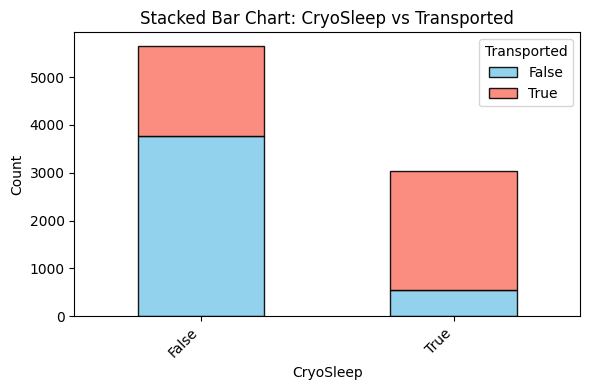

Transported  False  True 
VIP                      
False         4192   4302
True           123     76


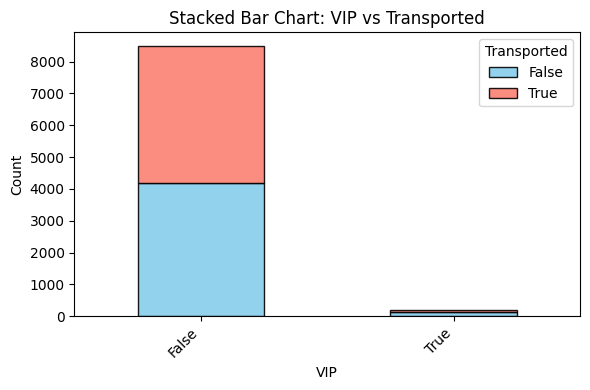

Transported
False    29.862572
True     27.733440
Name: Age, dtype: float64


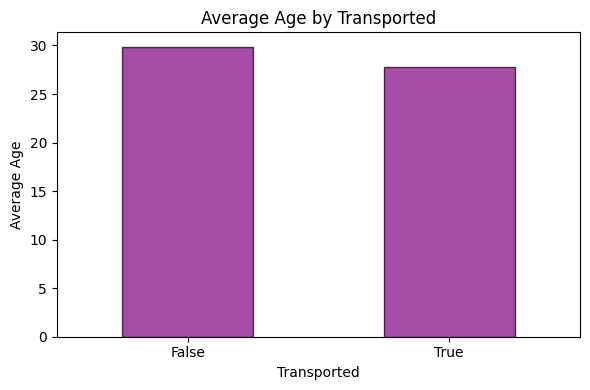

Transported
False    380.425261
True      61.901782
Name: RoomService, dtype: float64


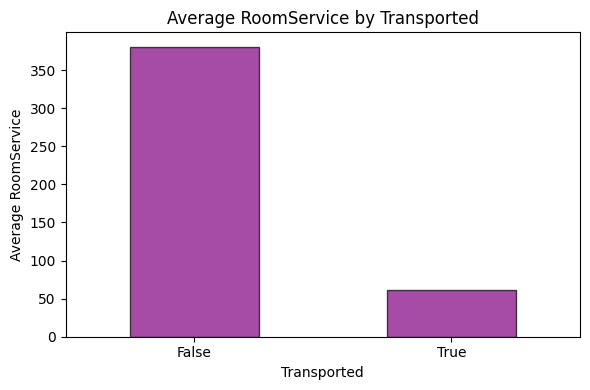

Transported
False    375.167555
True     520.646185
Name: FoodCourt, dtype: float64


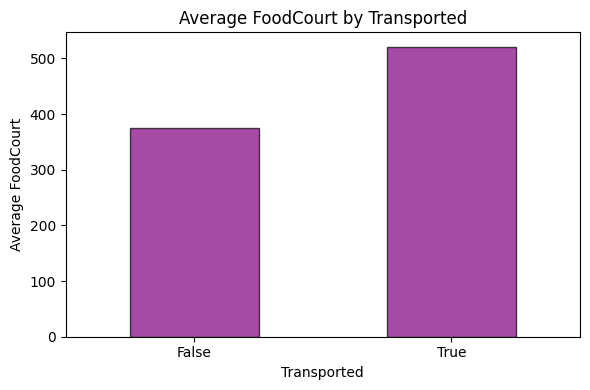

In [14]:
# Stacked bar chart for target vs categorical column (e.g., HomePlanet)
plot_relational_with_target(data, target_col='Transported', chart_type='stacked_bar', cat_col='HomePlanet')
plot_relational_with_target(data, target_col='Transported', chart_type='stacked_bar', cat_col='Destination')
plot_relational_with_target(data, target_col='Transported', chart_type='stacked_bar', cat_col='CryoSleep')
plot_relational_with_target(data, target_col='Transported', chart_type='stacked_bar', cat_col='VIP')

# Bar chart for average numerical column value by target (e.g., Age)
plot_relational_with_target(data, target_col='Transported', chart_type='avg_bar', num_col='Age')
plot_relational_with_target(data, target_col='Transported', chart_type='avg_bar', num_col='RoomService')
plot_relational_with_target(data, target_col='Transported', chart_type='avg_bar', num_col='FoodCourt')

# Supervised Model Fitting

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data.drop(columns=['PassengerId'], inplace=True)

# Label encoding for categorical columns
categorical_cols = data.select_dtypes("O").columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))

# Prepare features and target
X = data.drop(['Transported'], axis=1)
y = data['Transported']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function for fitting the models
def fit_model(model, X_train, y_train):
    """
    Fits a given model to the training data.

    Parameters:
    - model: The machine learning model to fit (e.g., DecisionTree, RandomForest, AdaBoost).
    - X_train: Training feature data.
    - y_train: Training target data.

    Returns:
    - model: The fitted model.
    """
    model.fit(X_train, y_train)
    return model

# Function for making predictions
def predict_model(model, X_test):
    """
    Makes predictions using a trained model.

    Parameters:
    - model: The trained model.
    - X_test: Test feature data.

    Returns:
    - y_pred: Predicted target values.
    """
    y_pred = model.predict(X_test)
    return y_pred

# Function for evaluating the model
def evaluate_model(y_test, y_pred, model_name):
    """
    Evaluates the performance of the model using accuracy and classification metrics,
    and plots the confusion matrix.

    Parameters:
    - y_test: Actual target values.
    - y_pred: Predicted target values.
    - model_name: Name of the model being evaluated.

    Prints:
    - Accuracy score.
    - Classification report.
    - Confusion matrix plot.
    """
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Trans', 'Trans'],
                yticklabels=['Not Trans', 'Trans'])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    return accuracy


--- Decision Tree ---
Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.72      0.73      1289
        True       0.73      0.75      0.74      1319

    accuracy                           0.74      2608
   macro avg       0.74      0.74      0.74      2608
weighted avg       0.74      0.74      0.74      2608



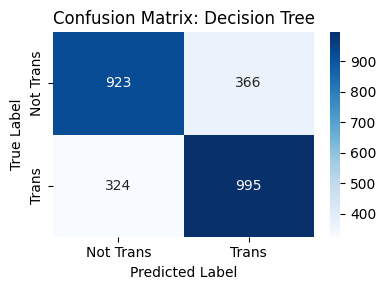


--- Random Forest ---
Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.79      0.79      1289
        True       0.79      0.78      0.79      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



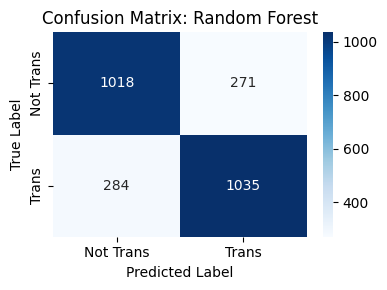


--- AdaBoost ---
Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.74      0.77      1289
        True       0.76      0.82      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



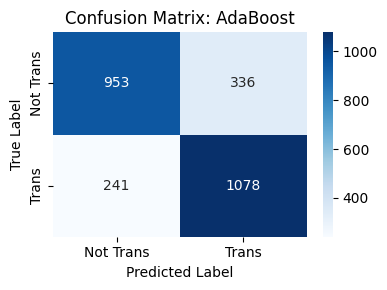

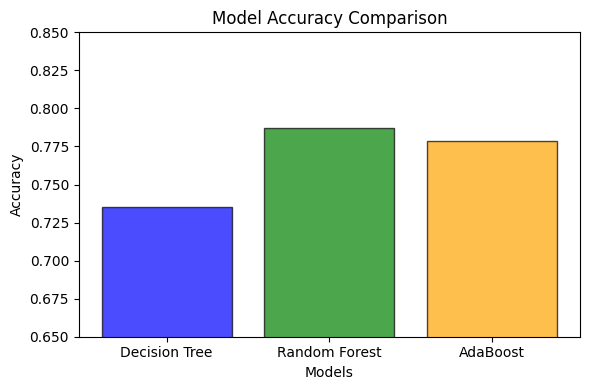

In [17]:
# Models to fit and compare
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}
accuracies = {}

# Fit, predict, and evaluate each model
for model_name, model in models.items():
    print(f"\n--- {model_name} ---")
    fitted_model = fit_model(model, X_train, y_train)
    y_pred = predict_model(fitted_model, X_test)
    accuracies[model_name] = evaluate_model(y_test, y_pred, model_name)

# Bar chart to compare accuracies
plt.figure(figsize=(6, 4))
plt.bar(x=list(accuracies.keys()), height=list(accuracies.values()), color=['blue', 'green', 'orange'], alpha=0.7, edgecolor='black')
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0.65, 0.85)
plt.tight_layout()
plt.show()

# Clustering

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Function to preprocess data for clustering
def preprocess_clustering_data(data, features):
    """
    Preprocesses data for clustering by scaling the selected features.

    Parameters:
    - data (DataFrame): The dataset.
    - features (list): List of numerical features to include in clustering.

    Returns:
    - X_scaled (ndarray): Scaled feature data.
    """
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data[features])
    return X_scaled

# Function to determine the optimal number of clusters using the Elbow Method
def determine_optimal_clusters(X_scaled, max_clusters=10):
    """
    Determines the optimal number of clusters using the Elbow Method.

    Parameters:
    - X_scaled (ndarray): Scaled feature data.
    - max_clusters (int): Maximum number of clusters to test.

    Displays:
    - Elbow plot for WCSS (Within-Cluster Sum of Squares).
    """
    wcss = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', color='blue')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.tight_layout()
    plt.show()

# Function to perform clustering and assign cluster labels
def perform_clustering(data, X_scaled, n_clusters):
    """
    Performs K-Means clustering and assigns cluster labels to the dataset.

    Parameters:
    - data (DataFrame): The original dataset.
    - X_scaled (ndarray): Scaled feature data.
    - n_clusters (int): Number of clusters to form.

    Returns:
    - DataFrame: Updated dataset with assigned cluster labels.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(X_scaled)
    return data

# Function to analyze clusters and their relationship with Transported
def analyze_clusters(data, cluster_col='Cluster', target_col='Transported', features=None):
    """
    Analyzes the characteristics of each cluster and their Transported status.

    Parameters:
    - data (DataFrame): The dataset with cluster labels.
    - cluster_col (str): Column name for cluster labels.
    - target_col (str): Column name for the target variable.
    - features (list): List of features to include in the cluster analysis.

    Displays:
    - Summary of mean feature values for each cluster and Transported group.
    """
    if features is None:
        features = data.columns.drop([cluster_col, target_col])
    cluster_summary = data.groupby([cluster_col, target_col])[features].mean()
    return cluster_summary


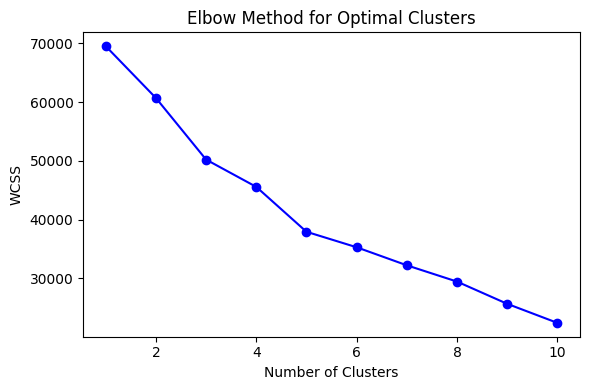

In [19]:
features = ['HomePlanet', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']
X_clustering = data[features]

# Preprocess and scale data for clustering
X_scaled = preprocess_clustering_data(data, features=X_clustering.columns)

# Determine the optimal number of clusters
determine_optimal_clusters(X_scaled, max_clusters=10)

In [21]:
optimal_clusters = 3
data_with_clusters = perform_clustering(data, X_scaled, n_clusters=optimal_clusters)

# Analyze clusters and their Transported status
cluster_analysis = analyze_clusters(data_with_clusters, cluster_col='Cluster', target_col='Transported', features=X_clustering.columns)
cluster_analysis.round(1)

HomePlanet  CryoSleep   Age  VIP  RoomService  FoodCourt  \
Cluster Transported                                                             
0       False               1.4        0.0  38.1  1.0        710.7     1000.6   
        True                1.1        0.3  36.2  1.0         65.0     2980.6   
1       False               0.6        0.0  30.3  0.0        427.2      411.2   
        True                0.6        0.0  27.2  0.0        144.6     1115.7   
2       False               0.2        1.0  25.0  0.0          0.0        0.0   
        True                0.9        1.0  27.9  0.0          0.0        0.0   

                     ShoppingMall     Spa  
Cluster Transported                        
0       False               251.7  1006.7  
        True                225.0   342.6  
1       False               185.9   621.1  
        True                407.4   129.5  
2       False                 0.0     0.0  
        True                  0.0     0.0

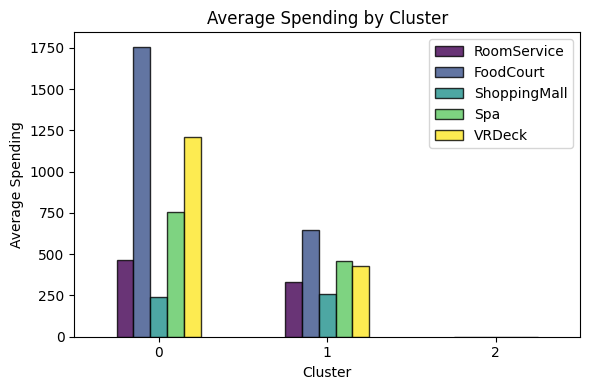

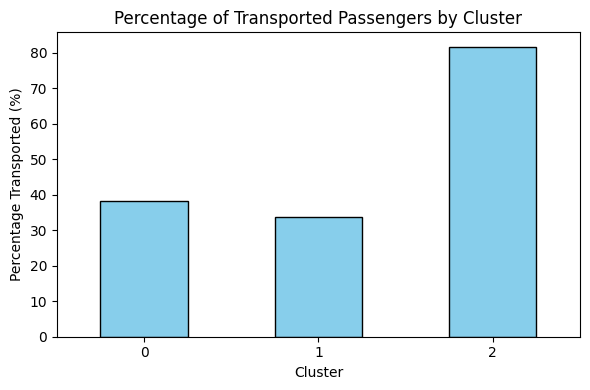

In [25]:
# Bar plot: Average spending by cluster for key categories
cluster_avg = data_with_clusters.groupby("Cluster")[
    ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
].mean()

cluster_avg.plot(kind="bar", figsize=(6, 4), colormap="viridis", alpha=0.8, edgecolor="black")
plt.title("Average Spending by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Spending")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar plot: Transported percentages in each cluster
transported_percentages = data_with_clusters.groupby("Cluster")["Transported"].mean() * 100
transported_percentages.plot(kind="bar", color="skyblue", edgecolor="black", figsize=(6, 4))
plt.title("Percentage of Transported Passengers by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Percentage Transported (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
